# sklearn.metrics.roc_curve

> sklearn.metrics.roc_curve(_y_true_, _y_score_, _*_, _pos_label=None_, _sample_weight=None_, _drop_intermediate=True_)[[source]](https://github.com/scikit-learn/scikit-learn/blob/364c77e04/sklearn/metrics/_ranking.py#L904)[  
](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve "Permalink to this definition")

- 원본 문서에서 parameter 등 정리할 것

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df
# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [7]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , confusion_matrix, f1_score

In [8]:
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1Score = f1_score(y_test, pred)

    print('오차행렬')
    print(confusion)
    # print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, f1Score : {f1_score:.4f}'.format(accuracy, precision, recall, f1_score))
    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, f1Score : {f1Score:.4f}')

In [9]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출.
titanic_df = pd.read_csv('../datasets/titanic/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test,lr_pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 : 0.8492, 정밀도 : 0.7742, 재현율 : 0.7869, f1Score : 0.7805


In [10]:
import matplotlib.pyplot as plt

In [1]:
from sklearn.metrics import roc_curve

In [14]:
#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)

# 반환된 thresholds 배열에서 샘플로 데이터를 추출하되, 임계값을 5step 으로 추출
# threholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arrange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index:', thr_index)
print('샘플 index로 추출한 임계값:', np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임계값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임계값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임계값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임계값별 FPR:  [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임계값별 TPR:  [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


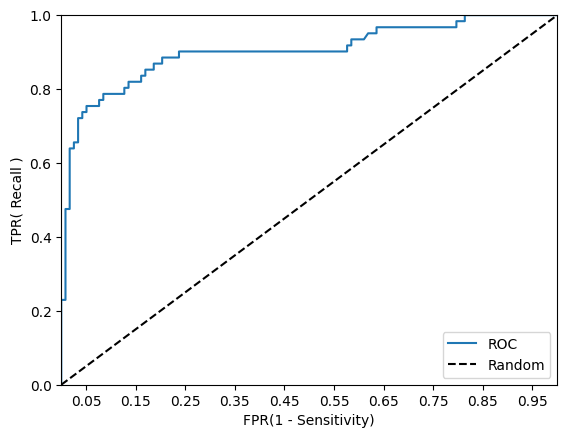

In [22]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값을 반환 받음.
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    # Roc Curve를 plot 곡선으로 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 점선 
    plt.plot([0,1], [0,1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1단위로 변경 & X,Y 축 label설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1 - Sensitivity)'); plt.ylabel('TPR( Recall )') 
    plt.legend()
    plt.show()

roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

In [21]:
from sklearn.metrics import roc_auc_score

# pred = lr_clf.predict(X_test)
# roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0: .4f}'.format(roc_score)) 

ROC AUC 값:  0.9024


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [24]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state= 11)

In [25]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

In [26]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

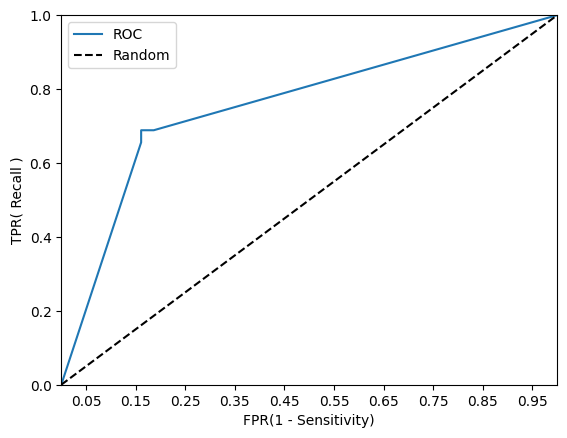

In [27]:
roc_curve_plot(y_test, dt_clf.predict_proba(X_test)[:,1])

In [28]:
pred_proba = dt_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0: .4f}'.format(roc_score)) 

ROC AUC 값:  0.7572


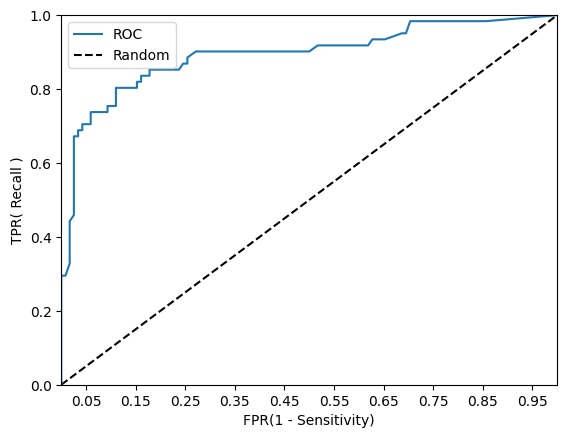

In [29]:
roc_curve_plot(y_test, rf_clf.predict_proba(X_test)[:,1])

In [30]:
pred_proba = rf_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0: .4f}'.format(roc_score)) 

ROC AUC 값:  0.8936
